# Performance of LeNet-5

In [1]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from scripts.utils import ExpResults

In [147]:
plotproperties = {'font.size': 13,
                  'axes.titlesize': 'xx-large',
                  'axes.labelsize': 'xx-large',
                  'xtick.labelsize': 'xx-large',
                  'xtick.major.size': 7,
                  'xtick.minor.size': 5,
                  'ytick.labelsize': 'xx-large',
                  'ytick.major.size': 7,
                  'ytick.minor.size': 5,
                  'legend.fontsize': 'x-large',
                  'figure.figsize': (7, 6),
                  'savefig.dpi': 300,
                  'savefig.format': 'pdf'}

import matplotlib as mpl
mpl.rcParams.update(plotproperties)

## Parameters and definitions

In [150]:
base_dir = '/home/rbodo/.snntoolbox/data/mnist/cnn/lenet5/keras'
log_dir = os.path.join(base_dir, '32bit', 'log', 'gui')
runlabel_ttfs = '19'
runlabel_dyn_thresh = '20'
runlabel_clamped = '02'
runlabel_dyn_thresh2 = '21'  # Includes operations due to threshold updates
path_ttfs = os.path.join(log_dir, runlabel_ttfs)
path_dyn_thresh = os.path.join(log_dir, runlabel_dyn_thresh)
path_dyn_thresh2 = os.path.join(log_dir, runlabel_dyn_thresh2)
path_clamped = os.path.join(base_dir, 'clamped_relu', 'log', 'gui', runlabel_clamped)


In [158]:
exp_ttfs = ExpResults(path_ttfs, 'TTFS base', 'o', 'blue')
exp_dyn_thresh = ExpResults(path_dyn_thresh, 'TTFS dyn thresh', '^', 'red')
exp_dyn_thresh2 = ExpResults(path_dyn_thresh2, 'TTFS dyn thresh\nincl thresh updates', 'v', 'red')
exp_clamped = ExpResults(path_clamped, 'TTFS clamped', '+', 'green')
experiments = [exp_ttfs, exp_dyn_thresh, exp_dyn_thresh2, exp_clamped]

## Plot error vs operations

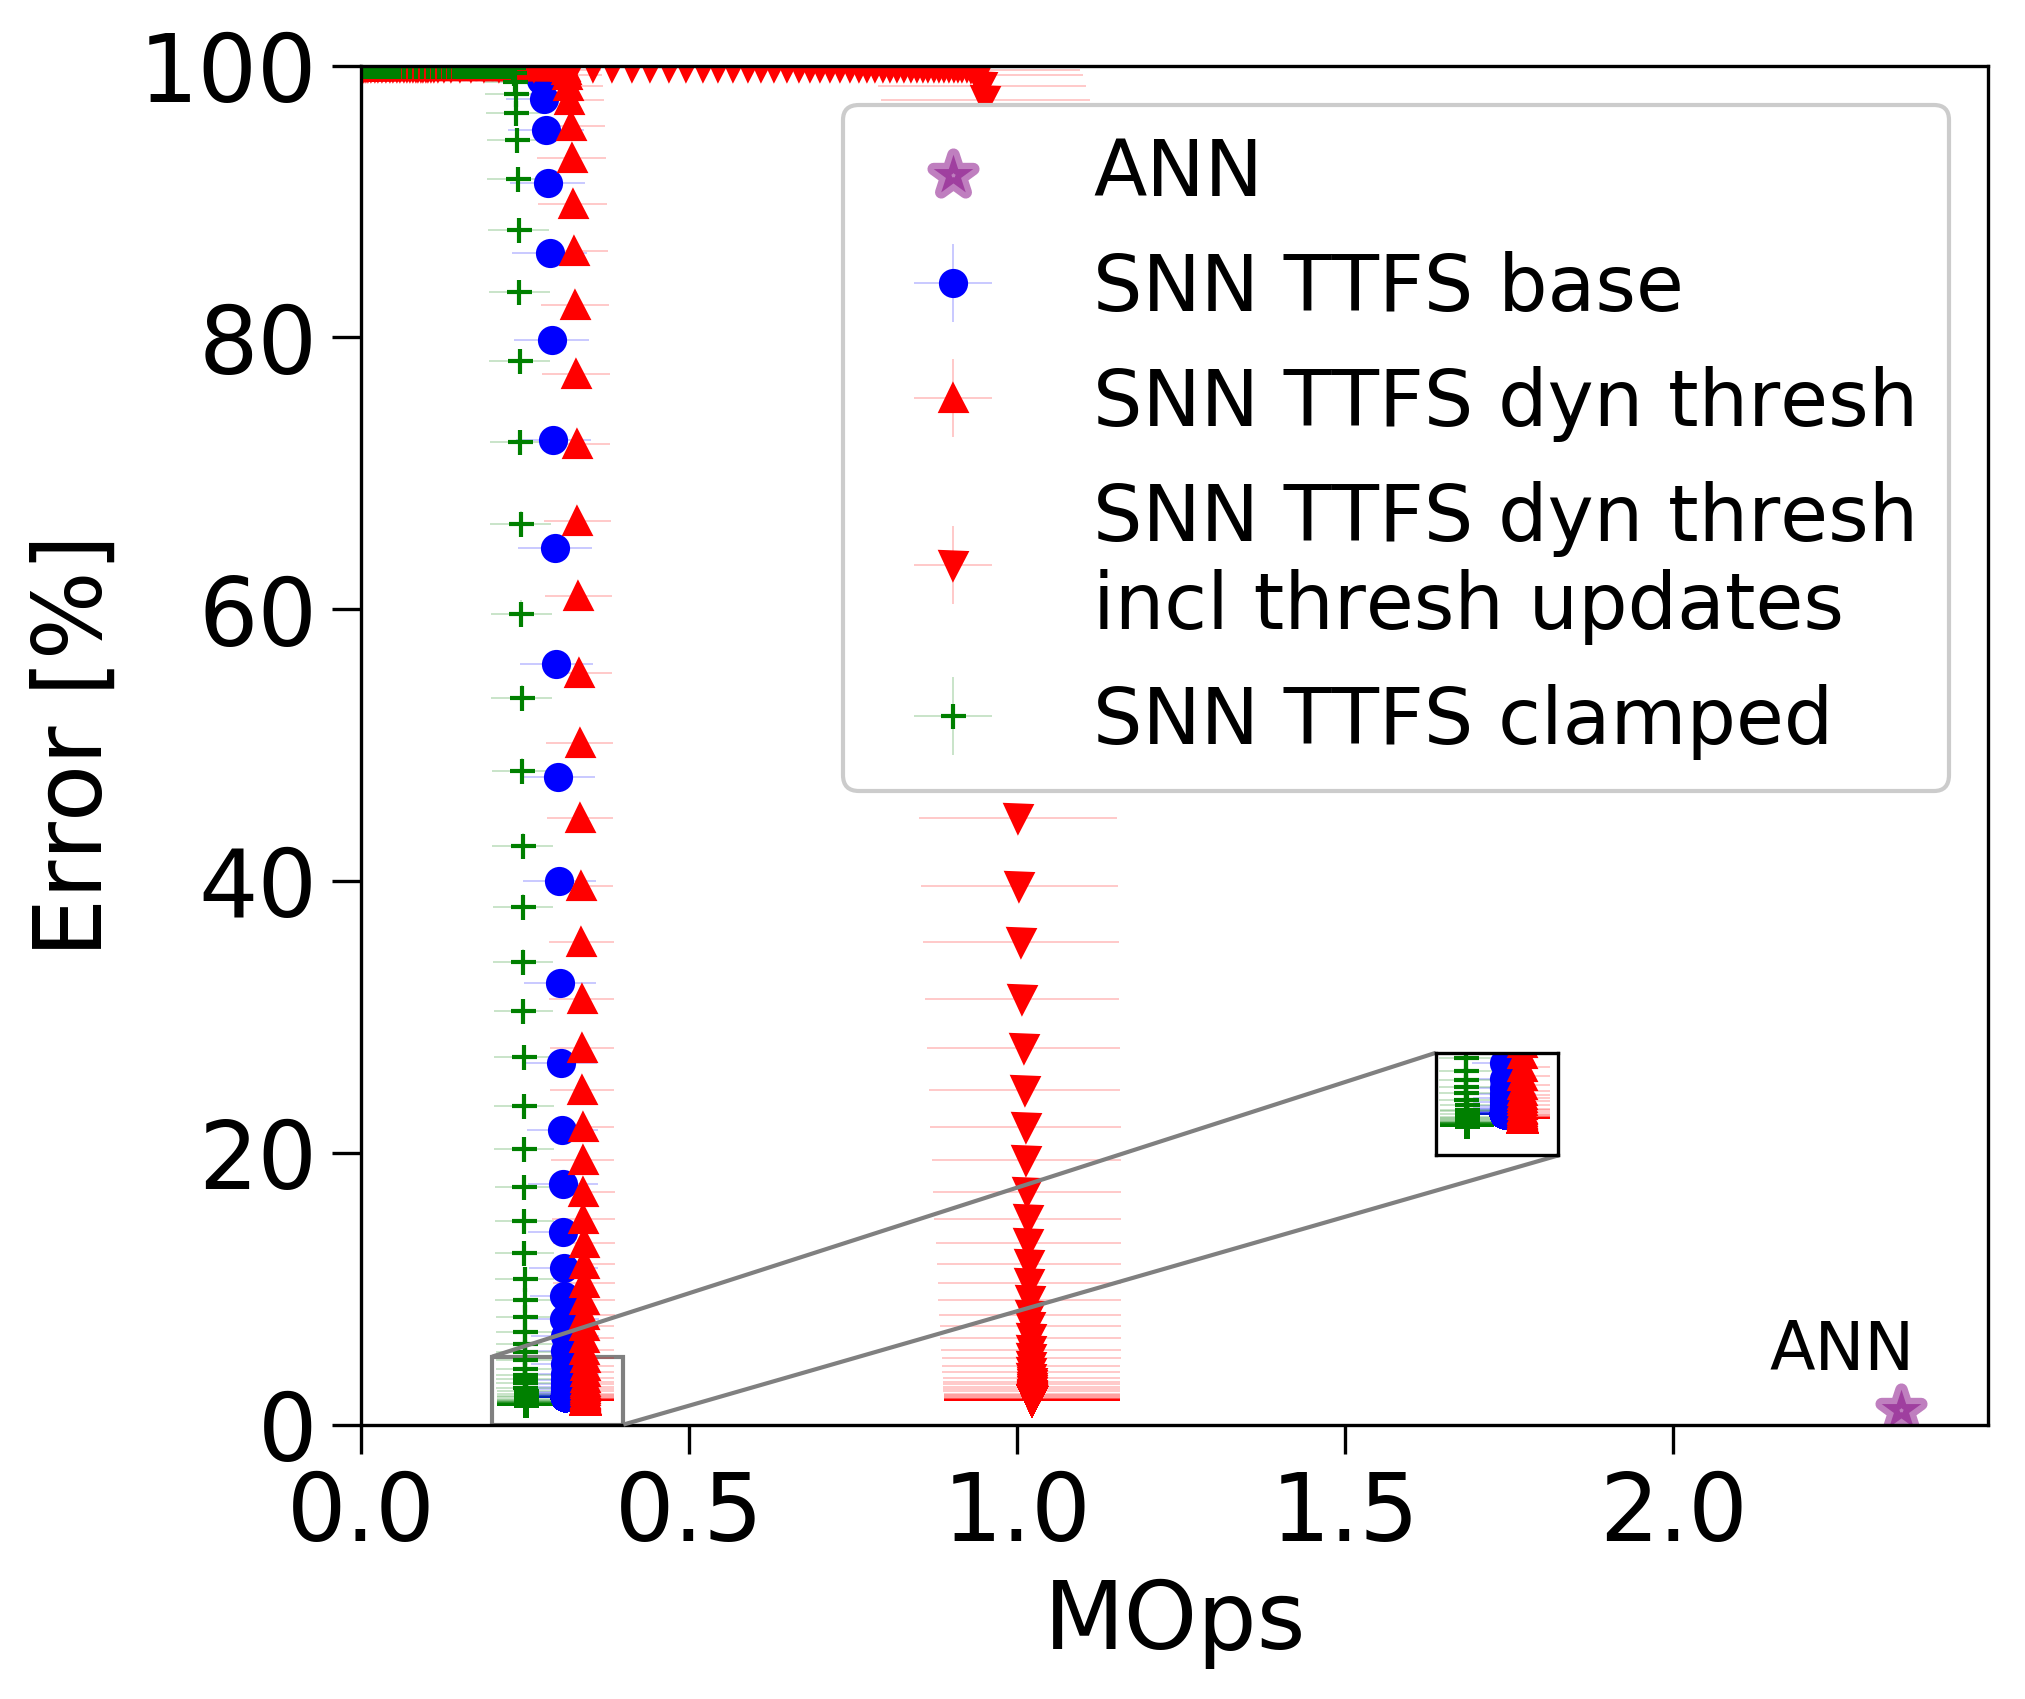

In [159]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, InsetPosition, mark_inset

show_numbers = False

fig, ax = plt.subplots()
axins = zoomed_inset_axes(ax, 5)

for exp in experiments:
    ax.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)
    axins.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
                   yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

axins.axis([0.2, 0.4, 0, 5])
ip = InsetPosition(axins, [0.25, 0.075, .65, .65])
axins.set_axes_locator(ip)

axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

exp = experiments[0]
ax.scatter(exp.operations_ann, exp.e1_ann, marker='*', s=100, label='ANN', color='purple', alpha=0.5, linewidths=3)
ax.annotate('ANN', xy=(exp.operations_ann - 0.2, exp.e1_ann + 3), fontsize=16)

if show_numbers:
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.8, exp.e1_ann + 7), fontsize=16, color=exp.color1)
    plt.annotate('({:.2f} MOps, {:.2f}%)'.format(exp.op1_0, exp.e1_0), xy=(exp.op1_0, exp.e1_0),
                 xytext=(exp.op1_0, exp.e1_0 + 13), fontsize=16,
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

ax.set_xlim(0, None)
ax.set_ylim(0, 100)
ax.set_xlabel('MOps')
ax.set_ylabel('Error [%]')
leg = ax.legend(loc='upper right')
leg.get_frame().set_alpha(1)
# plt.title('ANN vs SNN performance')
fig.savefig(os.path.join(log_dir, 'err_vs_ops_mnist'), bbox_inches='tight')

In [160]:
for exp in experiments:
    print(exp.label)
    print('ANN top-1:                         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.operations_ann, exp.e1_ann))
    print('SNN top-1 best error:         ({:.5f} MOps/frame, {:.2f} %)'.format(exp.op1_0, exp.e1_0))
    print('')

TTFS base
ANN top-1:                         (2.34673 MOps/frame, 1.04 %)
SNN top-1 best error:         (0.31159 MOps/frame, 2.00 %)

TTFS dyn thresh
ANN top-1:                         (2.34673 MOps/frame, 1.04 %)
SNN top-1 best error:         (0.34130 MOps/frame, 1.80 %)

TTFS dyn thresh
incl thresh updates
ANN top-1:                         (2.34673 MOps/frame, 1.04 %)
SNN top-1 best error:         (1.02278 MOps/frame, 1.80 %)

TTFS clamped
ANN top-1:                         (2.34673 MOps/frame, 1.03 %)
SNN top-1 best error:         (0.25119 MOps/frame, 1.43 %)



In [161]:
np.argmin(experiments[3].e1_mean)

175